In [ ]:
# 상권 분석
# https://www.data.go.kr/data/15083033/fileData.do

In [1]:
!unzip '/content/drive/MyDrive/Colab Notebooks/소상공인시장진흥공단_상가(상권)정보_20221231.zip' -d '/content/drive/MyDrive/Colab Notebooks/data/상권분석'

Archive:  /content/drive/MyDrive/Colab Notebooks/소상공인시장진흥공단_상가(상권)정보_20221231.zip
replace /content/drive/MyDrive/Colab Notebooks/data/상권분석/[필독]파일열람방법.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/drive/MyDrive/Colab Notebooks/data/상권분석/[필독]파일열람방법.txt  
  inflating: /content/drive/MyDrive/Colab Notebooks/data/상권분석/소상공인시장진흥공단_상가(상권)정보_강원_202212.csv  
  inflating: /content/drive/MyDrive/Colab Notebooks/data/상권분석/소상공인시장진흥공단_상가(상권)정보_경기_202212.csv  
  inflating: /content/drive/MyDrive/Colab Notebooks/data/상권분석/소상공인시장진흥공단_상가(상권)정보_경남_202212.csv  
  inflating: /content/drive/MyDrive/Colab Notebooks/data/상권분석/소상공인시장진흥공단_상가(상권)정보_경북_202212.csv  
  inflating: /content/drive/MyDrive/Colab Notebooks/data/상권분석/소상공인시장진흥공단_상가(상권)정보_광주_202212.csv  
  inflating: /content/drive/MyDrive/Colab Notebooks/data/상권분석/소상공인시장진흥공단_상가(상권)정보_대구_202212.csv  
  inflating: /content/drive/MyDrive/Colab Note

In [3]:
import glob
import pandas as pd
file_lists = glob.glob('/content/drive/MyDrive/Colab Notebooks/data/상권분석/*.csv')

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium

In [8]:
df_202212_세종 = pd.read_csv(file_lists[0])
df_202212_세종.shape

(13399, 39)

In [9]:
df_202212_세종.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [23]:
# 상권중에 커피가 들어간 업종의 갯수
df_coffee =  df_202212_세종[df_202212_세종['상권업종소분류명'].str.contains('커피')]
df_coffee.shape

(679, 39)

In [25]:
# 서울의 커피전문점의 개수  
df_seoul = pd.read_csv( file_lists[-2])
df_seoul[df_seoul['상권업종소분류명'].str.contains('커피')]
df_seoul.shape

(377724, 39)

In [28]:
df_seoul2 =  df_seoul[df_seoul['상권업종소분류명'].str.contains('커피')]

In [31]:
# 커피전문점의 이름들...
# 상호명중에 가장 많은 이름의 상호를 찾아보자
df_seoul2['상호명'].value_counts()[:10]

카페         710
이디야커피      400
스타벅스       324
메가엠지씨커피    239
컴포즈커피      226
투썸플레이스     180
빽다방        157
공차         107
커피빈        101
커피베이        95
Name: 상호명, dtype: int64

In [36]:
df_coffee_id =  df_seoul2[df_seoul2['상호명'] == '이디야커피']
df_coffee_id.reset_index(drop=True,inplace=True)

In [ ]:
# 중복없이 지점만 출력
df_coffee_id['지점명'].unique()

In [ ]:
# 전처리... (커피전문점에 대해.... 이디야커피)
# 지점명이 na이면 해당 na의 상호명으로 대체
df_coffee_id[df_coffee_id['지점명'].isna()]

In [50]:
temp = df_coffee_id.loc[:,['상호명','지점명']].ffill(axis=1)
df_coffee_id.loc[:,'지점명']  = temp['지점명']

<ipython-input-50-f39628850e5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coffee_id.loc[:,'지점명']  = temp['지점명']


In [52]:
pd.options.display.max_columns = None

In [53]:
df_coffee_id.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,25435527,이디야커피,신길역점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,비알콜 음료점업,11,서울특별시,11560,영등포구,1156063000,신길1동,1156013200,신길동,1156013200100590002,1,대지,59,2.0,서울특별시 영등포구 신길동 59-2,115603118022,서울특별시 영등포구 영등포로,353,NaN,1156013200100590002019075,엔씨티오피스텔,서울특별시 영등포구 영등포로 353,150050,7318.0,NaN,1,NaN,126.918062,37.515118


In [ ]:
# 전국데이터에 대해서
# 1. 상권업종소분류명 에 커피가 포함되어  있는 데이터를 찾아서
# 2. 상호명의 수를 count하고
# 3. 가장많이 나온 프랜차이즈 상호에대해서 데이터를 정리..

In [55]:
df_lists = [pd.read_csv(file,low_memory=False) for file in file_lists]

In [56]:
df = pd.concat(df_lists)
df.shape

(2532877, 39)

In [ ]:
df_coffee =  df[df['상권업종소분류명'].str.contains('커피')]
df_coffee.head()

In [63]:
df_coffee['상호명'].value_counts()

카페              5218
이디야커피           2075
컴포즈커피           1376
스타벅스            1208
투썸플레이스           926
                ... 
Lifeofcookie       1
케빈유커피              1
데일리달콤              1
ARK                1
아히루                1
Name: 상호명, Length: 65770, dtype: int64

In [69]:
df_coffee.loc[df_coffee['상호명'].str.contains('이디야'),'상호명'].unique()

array(['이디야커피', '이디야커피전문점', '이디야커피달동사거리점', '이디야커피울산야음루첸점', '이디야커피숍',
       '이디야커피복산점', '이디야커피제주중문점', '이디야커피한라수목원점', '이디야커피서귀포이마트점', '케이디야스텍',
       '이디야커피프렌차이즈', '이디야에스프레소', '이디야커피강릉올림픽선수촌점', '이디야커피인제점인제점', '양양이디야',
       '이디야커피낙원점', '이디야커피홍천제일점', '이디야커피장학점', '이디야커피오창과학단지점', '이디야커피증평중앙점',
       '이디야커피청주분평점', '이디야드림플러스', '이디야커피대구송현점', '이디야커피대명동점', '이디야커피대구봉덕점',
       '이디야커피영광백수해안도로점', '이디야커피광양포스코점', '이디야커피순천중앙점', '이디야커피강진점',
       '이디야커피김제터미널점', '이디야커피익산터미널점', '이디야커피군산수송동점', '이디야커피익산어양동점',
       '이디야커피고창터미널점', '이디야커피격포점', '이디야커피익산역점', '이디야커피전주반월동점',
       '이디야커피전주팔복동점', '이디야커피전주고속터미널점', '이디야안골네거리', '행복한도시이디야커피전주에코로마네',
       '이디야커피을왕리점', '이디야커피인천학익점', '이디야부평굴다리', '이디야커피인하공전점', '송도이디야오네',
       '이디야커피안면점', '이디야커피천안상명대점', '이디야커피장항', '이디야커피덕곡점덕곡점',
       '이디야커피경주황성유림점', '이디야커피경북성주점', '이디야커피경주안강점', '이디야커피수영현대점',
       '이디야커피보수점', '이디야커피부산괴정대로점', '이디야커피경마공원점', '이디야커피부산금강로점',
       '이디야커피서부산유통지구점', '이디야커피국제물류점', '이디야커피유엔공원점', '이디야거제홈타운',
       '이디야커피창녕점', '이디야커피김해부원동점', '이디야커피창원

In [71]:
# 컬럼에서 '코드'가 들어 있는 컬럼을 제외한다.

In [78]:
df_coffee.columns[df_coffee.columns.str.contains('코드')] + ['건물관리번호']
df_coffee_drop = df_coffee.drop(columns = df_coffee.columns[df_coffee.columns.str.contains('코드')])

In [86]:
df_coffee_drop['상호명'].value_counts()[1:5]

이디야커피     2075
컴포즈커피     1376
스타벅스      1208
투썸플레이스     926
Name: 상호명, dtype: int64

In [87]:
df_coffee_drop['상호명'].value_counts()[1:5].index

Index(['이디야커피', '컴포즈커피', '스타벅스', '투썸플레이스'], dtype='object')

In [114]:
store_count = []
for store in ['이디야', '컴포즈', '스타벅스', '투썸플레이스']:
  count_ = len(df_coffee_drop.loc[df_coffee_drop['상호명'].str.contains(store), '상호명'])
  store_count.append(count_)

dict(zip(df_coffee_drop['상호명'].value_counts()[1:5].index,store_count))


{'이디야커피': 2224, '컴포즈커피': 1437, '스타벅스': 1506, '투썸플레이스': 1119}

In [115]:
 # 4개 지점의 데이터만 추출 
 major_store_4 = ['이디야', '컴포즈', '스타벅스', '투썸플레이스'] 

In [116]:
temp = [df_coffee_drop['상호명'].str.contains(i)  for i in major_store_4]

In [120]:
from functools import reduce
temp = reduce(lambda x,y: x+y, temp )

In [122]:
df_coffee_top4 = df_coffee_drop.loc[temp]

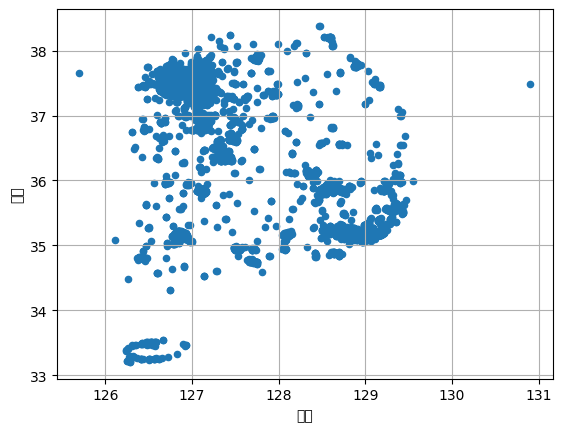

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.scatterplot(data = df_coffee_top4,x = '경도', y='위도')
df_coffee_top4.plot(kind = 'scatter', x = '경도', y='위도', grid=True)
plt.show()